# The London NYC:The Comparison of Neighborhoods in London and New York city

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Introduction](#0)<br>
2. [Importing Libraries](#2)<br>
3. [Data and Data cleaning](#4) <br>
4. [Explore the neighborhoods](#6) <br>
5. [Machine Learning](#8) <br>
6. [Clustering](#10) <br>   
7. [Discussion](#12) <br> 
7. [Conclusion](#14) <br>    
</div>
<hr>


# Introduction

London and New York. The Big Smoke and the Big Apple. Two of the biggest, most vibrant cities in the world. They are the most influential megacities of the anglosphere and of the world. London and New York City are also known as twin cities, therefore these two cities are alike in that they're both densely populated cosmopolitan metropolises, but they also have their differences. Assume that we've been asked to find the better city for launching a new branch of coffee shop or cafe. We have conducted an experiment where we compare the two cities in terms of their public venues, including coffee shops, cafes, restaurants, and etc to get a good meausre of each city's residents towards their choices of venue. it is noteworthy that the data for London's boroughs and neighborhoods were not readily available in .csv format so we scrapped Wikipedia (https://en.wikipedia.org/wiki/List_of_London_boroughs) to gather that data. The data was subsequently cleaned, for example, the columns that we didn't need were dropped and the column co-ordinates (51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ ) first were separated and then their strings, such as N, W, E, and degree sign were removed. Then we multiplied the data that has W(West) string by minus one because when a longitude is located in the west the result is negative. Finally we change their types as float. After exploring the data with foursquare, they were clustered using k-Means algorithms and labeled. So, without further ado, here is the exciting tourist-version competition between these two cities.

# Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
from bs4 import BeautifulSoup
import requests
from urllib import request, response, error, parse
from urllib.request import urlopen


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

# London Dataset

#### Web scraping

In [2]:
source= requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source,'lxml')
My_table = soup.find('table',{'class':'wikitable sortable'})
print(My_table.tr.text)


Borough

Inner

Status

Local authority

Political control

Headquarters

Area (sq mi)

Population (2013 est)[1]

Co-ordinates

 Nr. in map 



In [3]:
column_names = ['Borough','Inner','Status','Local authority','Political control','Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']
london_df = pd.DataFrame(columns = column_names)

In [4]:
for tr_cell in My_table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==10:
        london_df.loc[len(london_df)] = row_data
        
london_df.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
1,Barnet,,,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
2,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
3,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
4,Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20


## Data Cleaning

In [5]:
london_df.drop(['Inner', 'Status', 'Local authority','Political control','Headquarters','Area (sq mi)','Population (2013 est)[1]','Nr. in map'], axis = 1, inplace = True)
london_df.head()

,Borough,Co-ordinates
0,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [6]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in london_df['Co-ordinates']:
    
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split('/')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split('/')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
london_df['latitude'] = lat
london_df['longitude'] = lon
london_df.head()

,Borough,Co-ordinates,latitude,longitude
0,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿


In [7]:
london_df.drop(["Co-ordinates","latitude"], axis = 1,inplace = True) 
london_df.head()

,Borough,longitude
0,Barking and Dagenham [note 1],﻿51.5607°N 0.1557°E﻿
1,Barnet,﻿51.6252°N 0.1517°W﻿
2,Bexley,﻿51.4549°N 0.1505°E﻿
3,Brent,﻿51.5588°N 0.2817°W﻿
4,Bromley,﻿51.4039°N 0.0198°E﻿


In [8]:
london_df.rename(columns={'longitude':'Co-ordinates'}, inplace=True) 
london_df.head()

,Borough,Co-ordinates
0,Barking and Dagenham [note 1],﻿51.5607°N 0.1557°E﻿
1,Barnet,﻿51.6252°N 0.1517°W﻿
2,Bexley,﻿51.4549°N 0.1505°E﻿
3,Brent,﻿51.5588°N 0.2817°W﻿
4,Bromley,﻿51.4039°N 0.0198°E﻿


In [9]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in london_df['Co-ordinates']:
    
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split()[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split()[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
london_df['latitude'] = lat
london_df['longitude'] = lon
london_df.head()

,Borough,Co-ordinates,latitude,longitude
0,Barking and Dagenham [note 1],﻿51.5607°N 0.1557°E﻿,﻿51.5607°N,0.1557°E﻿
1,Barnet,﻿51.6252°N 0.1517°W﻿,﻿51.6252°N,0.1517°W﻿
2,Bexley,﻿51.4549°N 0.1505°E﻿,﻿51.4549°N,0.1505°E﻿
3,Brent,﻿51.5588°N 0.2817°W﻿,﻿51.5588°N,0.2817°W﻿
4,Bromley,﻿51.4039°N 0.0198°E﻿,﻿51.4039°N,0.0198°E﻿


In [10]:
london_df.drop(["Co-ordinates"], axis = 1,inplace = True) 
london_df.head()

,Borough,latitude,longitude
0,Barking and Dagenham [note 1],﻿51.5607°N,0.1557°E﻿
1,Barnet,﻿51.6252°N,0.1517°W﻿
2,Bexley,﻿51.4549°N,0.1505°E﻿
3,Brent,﻿51.5588°N,0.2817°W﻿
4,Bromley,﻿51.4039°N,0.0198°E﻿


In [11]:
london_df=london_df.replace(['°','﻿','N','E','W'],'',regex=True).astype(str)
london_df.head()

,Borough,latitude,longitude
0,Barking and Dagenham [note 1],51.5607,0.1557
1,Barnet,51.6252,0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,0.2817
4,Bromley,51.4039,0.0198


In [12]:
london_df['latitude'] =london_df['latitude'].astype('float64')
london_df['longitude'] = london_df['longitude'].astype('float64')
london_df.dtypes

Borough       object
latitude     float64
longitude    float64
dtype: object

In [13]:
london_df.loc[1,'longitude']=-0.1517
london_df.loc[3,'longitude']=-0.2817
london_df.loc[5,'longitude']=-0.1255
london_df.loc[6,'longitude']=-0.0977
london_df.loc[7,'longitude']=-0.3089
london_df.loc[8,'longitude']=-0.0799
london_df.loc[10,'longitude']=-0.0553
london_df.loc[11,'longitude']=-0.2339
london_df.loc[12,'longitude']=-0.1119
london_df.loc[13,'longitude']=-0.3346
london_df.loc[15,'longitude']=-0.4760
london_df.loc[16,'longitude']=-0.3680
london_df.loc[17,'longitude']=-0.1022
london_df.loc[18,'longitude']=-0.1947
london_df.loc[19,'longitude']=-0.3064
london_df.loc[20,'longitude']=-0.1163
london_df.loc[21,'longitude']=-0.0209
london_df.loc[22,'longitude']=-0.1958
london_df.loc[25,'longitude']=-0.3260
london_df.loc[26,'longitude']=-0.0804
london_df.loc[27,'longitude']=-0.1945
london_df.loc[28,'longitude']=-0.0059
london_df.loc[29,'longitude']=-0.0134
london_df.loc[30,'longitude']=-0.1910
london_df.loc[31,'longitude']=-0.1372

london_df

,Borough,latitude,longitude
0,Barking and Dagenham [note 1],51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198
5,Camden,51.5290,-0.1255
6,Croydon,51.3714,-0.0977
7,aling,51.5130,-0.3089
8,nfield,51.6538,-0.0799
9,Greenwich [note 2],51.4892,0.0648


## Web scraping for getting London's neighborhoods

In [14]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_areas_of_London').text
soup = BeautifulSoup(source,'lxml')
table=soup.find('table', attrs={'class':'wikitable sortable'})
print(table.tr.text)


Location
London borough
Post town
Postcode district
Dial code
OS grid ref



In [15]:
import pandas as pd
column_names= ['Location','London borough','Post town','Postcode district','Dial code','OS grid ref']
London_neighborhoods_df = pd.DataFrame(columns = column_names)
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==6:
        London_neighborhoods_df.loc[len(London_neighborhoods_df)] = row_data
        
London_neighborhoods_df.head()

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


### Data Cleaning

In [16]:
London_neighborhoods_df.drop(['Post town', 'Postcode district', 'Dial code','OS grid ref'], axis = 1, inplace = True)
London_neighborhoods_df.head()

,Location,London borough
0,Abbey Wood,"Bexley, Greenwich [7]"
1,Acton,"Ealing, Hammersmith and Fulham[8]"
2,Addington,Croydon[8]
3,Addiscombe,Croydon[8]
4,Albany Park,Bexley


In [17]:
London_neighborhoods_df.rename(columns={'Location':'Neighborhood','London borough':'Borough'}, inplace=True) 
London_neighborhoods_df.head()

,Neighborhood,Borough
0,Abbey Wood,"Bexley, Greenwich [7]"
1,Acton,"Ealing, Hammersmith and Fulham[8]"
2,Addington,Croydon[8]
3,Addiscombe,Croydon[8]
4,Albany Park,Bexley


### Merging the two previous datasets

In [18]:
final_london_df = pd.merge(london_df,
                 London_neighborhoods_df[['Neighborhood','Borough']],
                 on='Borough')
final_london_df.head()

,Borough,latitude,longitude,Neighborhood
0,Barnet,51.6252,-0.1517,Barnet Gate
1,Barnet,51.6252,-0.1517,Brent Cross
2,Barnet,51.6252,-0.1517,Childs Hill
3,Barnet,51.6252,-0.1517,Church End
4,Barnet,51.6252,-0.1517,Colindale


In [19]:
final_london_df.shape

(336, 4)

###### make sure that the London dataset has all 23 boroughs and 336 neighborhoods

In [20]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(final_london_df['Borough'].unique()),
        final_london_df.shape[0]
    )
)

The dataframe has 23 boroughs and 336 neighborhoods.


## Get the geo-coordinates of London city using the geopy library of python.


In [21]:
from geopy.geocoders import Nominatim
address = 'London, UK'

geolocator = Nominatim(user_agent="london_explorer")
location_london= geolocator.geocode(address)
latitude_london = location_london.latitude
longitude_london = location_london.longitude
print('The geograpical coordinate in London city are {}, {}.'.format(latitude_london, longitude_london))

The geograpical coordinate in London city are 51.5073219, -0.1276474.


###### Create a map of London city with all the boroughs superimposed on it.

In [22]:
import folium
map_london = folium.Map(location=[latitude_london, longitude_london], zoom_start=10)


for lat, lng, borough in zip(final_london_df['latitude'],final_london_df['longitude'],final_london_df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

# New york Dataset

In [23]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [24]:
import json
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
nyc_neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyc_neighborhoods = nyc_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
nyc_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [25]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location_nyc = geolocator.geocode(address)
latitude_nyc = location_nyc.latitude
longitude_nyc = location_nyc.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude_nyc, longitude_nyc))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


###### Create a map of New York city with all the boroughs superimposed on it.

In [26]:
map_newyork = folium.Map(location=[latitude_nyc, longitude_nyc], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(nyc_neighborhoods['Latitude'], nyc_neighborhoods['Longitude'],nyc_neighborhoods['Borough'],nyc_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

###### make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [27]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(nyc_neighborhoods['Borough'].unique()),
        nyc_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [28]:
#@hidden
CLIENT_ID = 'JGC0ITX53QVMZL4HKMBKPOCF1ZT3CKIQ0ZKCMZHTV2DW50KC' 
CLIENT_SECRET = '4FGP4BCXPK4NRGVNR2V5EZ15R2L5EKY4T11JZ2EQOXKOVRGE' 
VERSION = '20180605'

## Explore Neighborhoods

In [29]:
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format( CLIENT_ID,
                                                                                                                                    CLIENT_SECRET,
                                                                                                                                    VERSION,
                                                                                                                                    lat,
                                                                                                                                    lng,
                                                                                                                                    radius,
                                                                                                                                    LIMIT)
                                                                                                                                    
                                                                       
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## 1.Explore the neighborhoods in NYC

In [30]:
nyc_venues = getNearbyVenues(names=nyc_neighborhoods['Neighborhood'],
                                   latitudes=nyc_neighborhoods['Latitude'],
                                   longitudes=nyc_neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

## 2.Explore the neighborhoods in London

In [31]:
london_venues = getNearbyVenues(names=final_london_df['Neighborhood'],
                                   latitudes=final_london_df['latitude'],
                                   longitudes=final_london_df['longitude']
                                  )

Barnet Gate
Brent Cross
Childs Hill
Church End
Colindale
Colney Hatch
East Barnet
East Finchley
Edgware
Finchley
Friern Barnet
Golders Green
Grahame Park
The Hale
Hampstead Garden Suburb
Hendon
The Hyde
Mill Hill
Monken Hadley
New Barnet
New Southgate
North Finchley
Oakleigh Park
Osidge
Totteridge
West Hendon
Whetstone
Woodside Park
Albany Park
Blendon
Colyers
Crayford
Crook Log
Crossness
East Wickham
Erith
Foots Cray
Lamorbey
Lessness Heath
Longlands
North Cray
North End
Northumberland Heath
Sidcup
Slade Green
Upton
Welling
West Heath
Brent Park
Church End
Dollis Hill
Harlesden
Kensal Green
Kingsbury
Neasden
Preston
Queen's Park
Stonebridge
Tokyngton
Wembley
Wembley Park
Willesden
Chelsfield
Chislehurst
Coney Hall
Crystal Palace
Cudham
Derry Downs
Downe
Eden Park
Elmers End
Elmstead
Goddington
Hayes
Hazelwood
Keston
Leaves Green
Locksbottom
Mottingham
Orpington
Penge
Petts Wood
Plaistow
Pratt's Bottom
Southborough
St Mary Cray
St Paul's Cray
Sundridge
West Wickham
Widmore (also Widmor

## Let's check the size of the resulting dataframes

###### 1.NYC

In [32]:
print(nyc_venues.shape)
nyc_venues.head()

(10248, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Shell,40.894187,-73.845862,Gas Station
4,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898083,-73.850259,Caribbean Restaurant


In [33]:
nyc_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Allerton,33,33,33,33,33,33
Annadale,12,12,12,12,12,12
Arden Heights,5,5,5,5,5,5
Arlington,6,6,6,6,6,6
Arrochar,20,20,20,20,20,20
Arverne,18,18,18,18,18,18
Astoria,100,100,100,100,100,100
Astoria Heights,14,14,14,14,14,14
Auburndale,19,19,19,19,19,19


###### 2.London

In [34]:
print(london_venues.shape)
london_venues.head()

(14889, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barnet Gate,51.6252,-0.1517,The Atrium,51.624726,-0.151933,Café
1,Barnet Gate,51.6252,-0.1517,Beaconsfield Road (BF),51.622827,-0.151466,Bus Stop
2,Barnet Gate,51.6252,-0.1517,Beaconsfield Road (Bj),51.622664,-0.152108,Bus Stop
3,Barnet Gate,51.6252,-0.1517,Oakleigh Cafe,51.623412,-0.154899,Café
4,Brent Cross,51.6252,-0.1517,The Atrium,51.624726,-0.151933,Café


In [35]:
london_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Albany Park,30,30,30,30,30,30
Barnet Gate,4,4,4,4,4,4
Blendon,30,30,30,30,30,30
Brent Cross,4,4,4,4,4,4
Brent Park,75,75,75,75,75,75
Catford,32,32,32,32,32,32
Chalk Farm,99,99,99,99,99,99
Chase Cross,43,43,43,43,43,43
Cheam,35,35,35,35,35,35


## Analysis and Machine Learning

### 1.NYC

In [36]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_onehot['Neighbourhood'] = nyc_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noo

In [37]:
nyc_onehot.shape

(10248, 432)

In [38]:
venue_nyc_counts =nyc_onehot.groupby('Neighbourhood').sum()
venue_nyc_counts.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Nort

In [39]:
venue_nyc_counts_described=venue_nyc_counts.describe().transpose()

In [40]:
venue_nyc_top10=venue_nyc_counts_described.sort_values('max', ascending=False)[0:10]
venue_nyc_top10

,count,mean,std,min,25%,50%,75%,max
Korean Restaurant,301.0,0.225914,1.621355,0.0,0.0,0.0,0.0,23.0
Italian Restaurant,301.0,1.033223,1.999723,0.0,0.0,0.0,1.0,18.0
Clothing Store,301.0,0.269103,0.881670,0.0,0.0,0.0,0.0,9.0
Coffee Shop,301.0,0.976744,1.662164,0.0,0.0,0.0,1.0,9.0
Pizza Place,301.0,1.448505,1.458826,0.0,0.0,1.0,2.0,9.0
Bar,301.0,0.730897,1.541863,0.0,0.0,0.0,1.0,9.0
Deli / Bodega,301.0,0.893688,1.135192,0.0,0.0,1.0,1.0,9.0
Chinese Restaurant,301.0,0.724252,1.064758,0.0,0.0,0.0,1.0,9.0
Latin American Restaurant,301.0,0.292359,0.792196,0.0,0.0,0.0,0.0,9.0
Hotel,301.0,0.345515,1.032903,0.0,0.0,0.0,0.0,8.0


In [41]:
venue_nyc_top10_list = venue_nyc_top10.index.values.tolist()

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_nyc_top10_list):
    data = venue_nyc_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 10 Axes>

#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [43]:
nyc_grouped = nyc_onehot.groupby('Neighbourhood').mean().reset_index()
nyc_grouped.head()

,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noo

In [44]:
nyc_grouped.shape

(301, 432)

###### print each neighborhood along with the top 5 most common venues

In [45]:
num_top_venues = 5

for hood in nyc_grouped['Neighbourhood']:
    print("----"+hood+"----")
    nyc_temp = nyc_grouped[nyc_grouped['Neighbourhood'] == hood].T.reset_index()
    nyc_temp.columns = ['venue','freq']
    nyc_temp  =nyc_temp.iloc[1:]
    nyc_temp ['freq'] = nyc_temp ['freq'].astype(float)
    nyc_temp  =  nyc_temp .round({'freq': 2})
    print( nyc_temp .sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                venue  freq
0         Pizza Place  0.12
1  Chinese Restaurant  0.09
2    Department Store  0.06
3         Supermarket  0.06
4         Bus Station  0.06


----Annadale----
           venue  freq
0   Liquor Store  0.08
1     Restaurant  0.08
2         Bakery  0.08
3    Pizza Place  0.08
4  Train Station  0.08


----Arden Heights----
           venue  freq
0  Deli / Bodega   0.2
1       Bus Stop   0.2
2    Coffee Shop   0.2
3    Pizza Place   0.2
4       Pharmacy   0.2


----Arlington----
           venue  freq
0       Bus Stop  0.33
1  Deli / Bodega  0.17
2    Coffee Shop  0.17
3   Intersection  0.17
4  Boat or Ferry  0.17


----Arrochar----
                venue  freq
0            Bus Stop  0.10
1       Deli / Bodega  0.10
2         Pizza Place  0.10
3  Italian Restaurant  0.10
4      Sandwich Place  0.05


----Arverne----
             venue  freq
0        Surf Spot  0.22
1   Sandwich Place  0.11
2    Metro Station  0.11
3  Thai Restaurant  0.06
4       

###### Put the top 5 most common venues in the Pandas dataframe

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nyc_venues_sorted = pd.DataFrame(columns=columns)
nyc_venues_sorted['Neighbourhood'] = nyc_grouped['Neighbourhood']

for ind in np.arange(nyc_grouped.shape[0]):
    nyc_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

nyc_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allerton,Pizza Place,Chinese Restaurant,Deli / Bodega,Bus Station,Department Store
1,Annadale,Diner,Deli / Bodega,Pub,Train Station,Dance Studio
2,Arden Heights,Deli / Bodega,Pharmacy,Bus Stop,Coffee Shop,Pizza Place
3,Arlington,Bus Stop,Boat or Ferry,Deli / Bodega,Intersection,Coffee Shop
4,Arrochar,Pizza Place,Deli / Bodega,Bus Stop,Italian Restaurant,Middle Eastern Restaurant


### 2.London

In [48]:
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

london_onehot['Neighbourhood'] = london_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Neighbourhood,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lighting Store,Lingerie Store,Liquor Store,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Persian Restaurant,Pharmacy,Pizza Place,Platform,Plaza,Pool Hall,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Roof Deck,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Smoothie Shop,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barnet Gate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barnet Gate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Barnet Gate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Barnet Gate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [49]:
london_onehot.shape

(14889, 181)

In [50]:
venue_london_counts =london_onehot.groupby('Neighbourhood').sum()
venue_london_counts_described=venue_london_counts.describe().transpose()
venue_london_top10=venue_london_counts_described.sort_values('max', ascending=False)[0:10]
venue_london_top10

,count,mean,std,min,25%,50%,75%,max
Coffee Shop,332.0,3.725904,2.947710,0.0,2.0,3.0,6.0,13.0
Pub,332.0,2.786145,2.936290,0.0,0.0,1.0,5.0,11.0
Clothing Store,332.0,2.111446,2.408994,0.0,0.0,1.0,5.0,11.0
Hotel,332.0,1.427711,2.064859,0.0,0.0,1.0,2.0,8.0
Café,332.0,1.825301,1.812901,0.0,1.0,1.0,2.0,8.0
Italian Restaurant,332.0,1.518072,1.559390,0.0,0.0,1.0,2.0,6.0
Caribbean Restaurant,332.0,0.222892,0.994708,0.0,0.0,0.0,0.0,6.0
Restaurant,332.0,0.635542,1.061408,0.0,0.0,0.0,1.0,5.0
Bar,332.0,1.045181,1.342229,0.0,0.0,1.0,2.0,5.0
Mediterranean Restaurant,332.0,0.325301,0.907950,0.0,0.0,0.0,0.0,5.0


In [51]:
venue_london_top10_list = venue_london_top10.index.values.tolist()

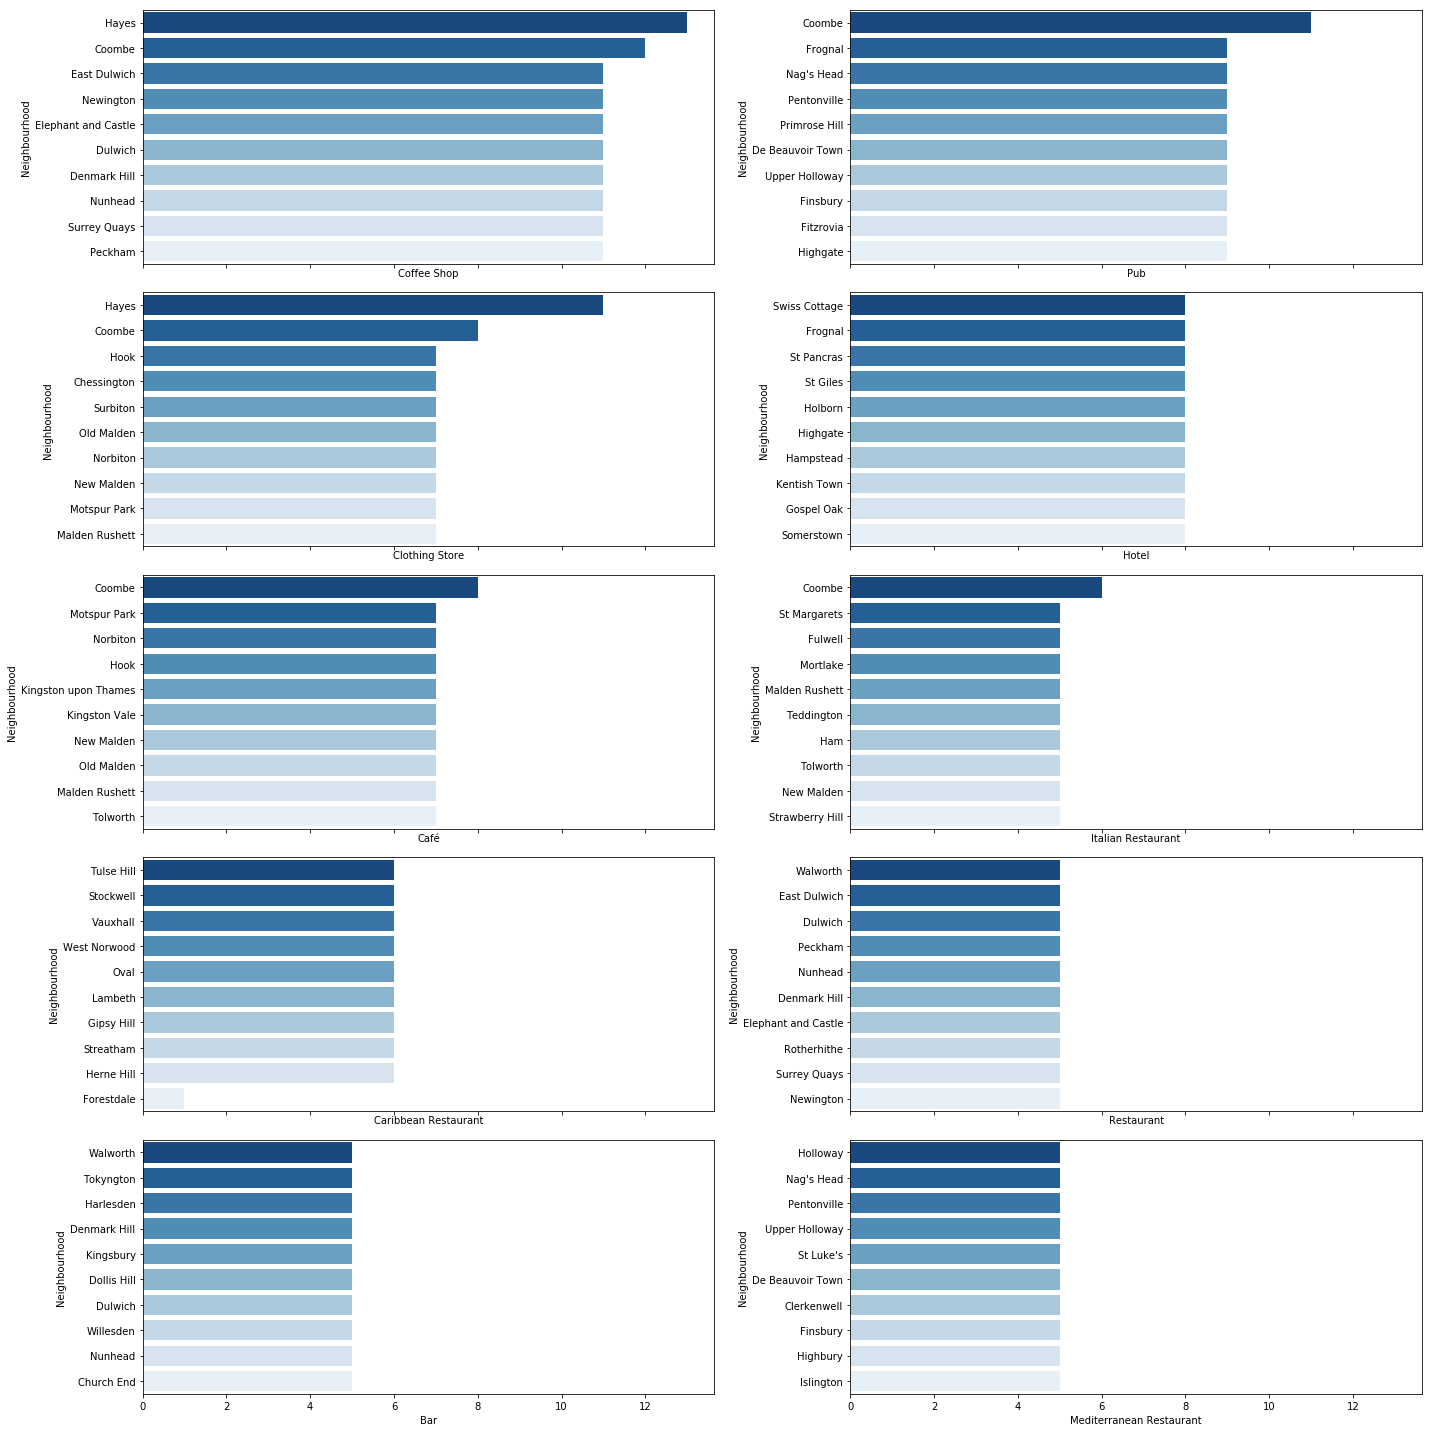

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_london_top10_list):
    data = venue_london_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show()

#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [53]:
london_grouped = london_onehot.groupby('Neighbourhood').mean().reset_index()
london_grouped.head()


,Neighbourhood,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lighting Store,Lingerie Store,Liquor Store,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Persian Restaurant,Pharmacy,Pizza Place,Platform,Plaza,Pool Hall,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Roof Deck,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Smoothie Shop,South American Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Albany Park,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.100000,0.0,0.100000,0.0,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.066667,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.000000,0.00,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.033333,0.0,0.033333,0.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.0
1,Barnet Gate,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.5,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0

In [54]:
london_grouped.shape

(332, 181)

###### print each neighborhood along with the top 5 most common venues

In [55]:
num_top_venues = 5

for hood in london_grouped['Neighbourhood']:
    print("----"+hood+"----")
    london_temp = london_grouped[london_grouped['Neighbourhood'] == hood].T.reset_index()
    london_temp.columns = ['venue','freq']
    london_temp  =london_temp.iloc[1:]
    london_temp ['freq'] = london_temp ['freq'].astype(float)
    london_temp  =  london_temp .round({'freq': 2})
    print( london_temp .sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
                  venue  freq
0                   Pub  0.10
1        Clothing Store  0.10
2           Coffee Shop  0.10
3    Italian Restaurant  0.07
4  Fast Food Restaurant  0.07


----Barnet Gate----
                           venue  freq
0                       Bus Stop   0.5
1                           Café   0.5
2  Paper / Office Supplies Store   0.0
3         Okonomiyaki Restaurant   0.0
4                   Optical Shop   0.0


----Blendon----
                  venue  freq
0                   Pub  0.10
1        Clothing Store  0.10
2           Coffee Shop  0.10
3    Italian Restaurant  0.07
4  Fast Food Restaurant  0.07


----Brent Cross----
                           venue  freq
0                       Bus Stop   0.5
1                           Café   0.5
2  Paper / Office Supplies Store   0.0
3         Okonomiyaki Restaurant   0.0
4                   Optical Shop   0.0


----Brent Park----
               venue  freq
0              Hotel  0.09
1        Coffee

###### Put the top 5 most common venues in the Pandas dataframe

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
london_venues_sorted = pd.DataFrame(columns=columns)
london_venues_sorted['Neighbourhood'] = london_grouped['Neighbourhood']

for ind in np.arange(london_grouped.shape[0]):
    london_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

london_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albany Park,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket
1,Barnet Gate,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
2,Blendon,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket
3,Brent Cross,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
4,Brent Park,Hotel,Coffee Shop,Bar,Clothing Store,Grocery Store


# Clustering Neighborhoods

### 1.NYC

Run k-means to count Neighborhoods for each cluster label for variable cluster size

In [58]:
nyc_grouped_clustering = nyc_grouped.drop('Neighbourhood', 1)

Determine the optimal number of clusters for k-means clustering

**The Elbow Method** - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.

In [59]:
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(nyc_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

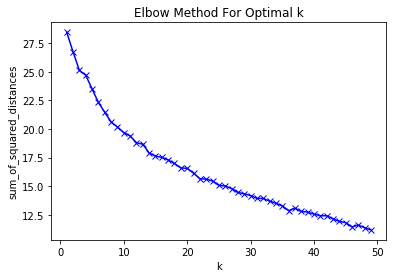

In [60]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

Elbow method does not seem to help us to determine the optimal number of clusters. Let's use another method.

**The Silhouette Method** - The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [61]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(nyc_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(nyc_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

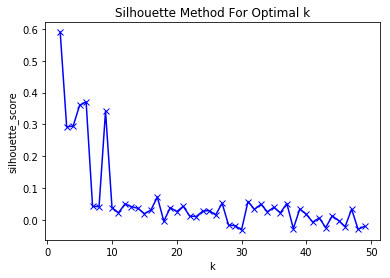

In [62]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

There is a peak at k = 2, k =5 and k = 6. 2 clusters will give a very broad classification of the venues.

So **the number of clustering will be 5**.

In [79]:
kclusters =5

nyc_grouped_clustering = nyc_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 3, 3, 0, 0, 0, 0, 0], dtype=int32)

###### creating a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood

In [82]:
# add clustering labels
nyc_venues_sorted.insert(0, 'Cluster Labels1', kmeans.labels_)
nyc_merged = nyc_neighborhoods
nyc_merged = nyc_merged.join(nyc_venues_sorted.set_index('Neighbourhood'), on='Neighborhood')
nyc_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels1,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,0.0,1.0,Donut Shop,Gas Station,Caribbean Restaurant,Laundromat,Food
1,Bronx,Co-op City,40.874294,-73.829939,0.0,1.0,Bus Station,Baseball Field,Gift Shop,Pizza Place,Mattress Store
2,Bronx,Eastchester,40.887556,-73.827806,0.0,1.0,Bus Station,Caribbean Restaurant,Deli / Bodega,Diner,Convenience Store
3,Bronx,Fieldston,40.895437,-73.905643,0.0,1.0,Plaza,Bus Station,River,Zoo Exhibit,Event Space
4,Bronx,Riverdale,40.890834,-73.912585,0.0,1.0,Park,Bus Station,Food Truck,Gym,Plaza


In [83]:
nyc_merged.dtypes

Borough                   object
Neighborhood              object
Latitude                 float64
Longitude                float64
Cluster Labels1          float64
Cluster Labels           float64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
dtype: object

As we see the type of 'Cluster Lables' column is float and it must be int to enable us to draw a map so we change the type of this column

In [85]:
nyc_merged=nyc_merged.fillna(0)
nyc_merged['Cluster Labels1'] =nyc_merged['Cluster Labels'].astype('int64')

###### visualizing the resulting clusters

In [86]:
# create map
map_nyc_clusters = folium.Map(location=[latitude_nyc, longitude_nyc], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels1']):
    label = folium.Popup(str(poi) + ' Cluster '+ str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_nyc_clusters)
       
map_nyc_clusters

### 2.London

Run k-means to count Neighborhoods for each cluster label for variable cluster size

In [87]:
london_grouped_clustering = london_grouped.drop('Neighbourhood', 1)

**The Silhouette Method**

In [90]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,29)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(london_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(london_grouped_clustering, labels,metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  return_n_iter=True)


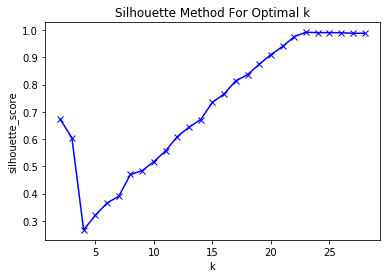

In [91]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

 There is a peak at k = 2, k = 3 and k = 5. 2 and 3 clusters will give a very broad classification of the venues **the number for London clustering will be 5**.


In [92]:
kclusters = 5

london_grouped_clustering =london_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 3, 1, 4, 4, 4, 3, 3, 4], dtype=int32)

###### creating a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood

In [93]:
# add clustering labels
london_venues_sorted.insert(0, 'London Cluster Labels1', kmeans.labels_)

london_merged = final_london_df

london_merged = london_merged.join(london_venues_sorted.set_index('Neighbourhood'), on='Neighborhood')

london_merged.head() # check the last columns!

,Borough,latitude,longitude,Neighborhood,London Cluster Labels1,London Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barnet,51.6252,-0.1517,Barnet Gate,1,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
1,Barnet,51.6252,-0.1517,Brent Cross,1,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
2,Barnet,51.6252,-0.1517,Childs Hill,1,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
3,Barnet,51.6252,-0.1517,Church End,4,1,Hotel,Coffee Shop,Bar,Clothing Store,Café
4,Barnet,51.6252,-0.1517,Colindale,1,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe


###### visualizing the resulting clusters

In [94]:
# create map
map_london_clusters = folium.Map(location=[latitude_london, longitude_london], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['latitude'], london_merged['longitude'], london_merged['Neighborhood'],london_merged['London Cluster Labels1']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_london_clusters)
       
map_london_clusters

# Examining Clusters

We can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories,we can then assign a name to each cluster.

### 1.NYC

In [95]:
nyc_required_column=['Borough','1st Most Common Venue','2nd Most Common Venue']

###### Cluster 1

In [96]:
nyc_cluster_1=nyc_merged.loc[nyc_merged['Cluster Labels1'] == 0, nyc_merged.columns[[0]+[1]+ list(range(5, nyc_merged.shape[1]))]]
nyc_cluster_1

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
77,Brooklyn,Manhattan Beach,0,Café,Bus Stop,Beach,Pizza Place,Playground
172,Queens,Breezy Point,0,Trail,Beach,Bus Stop,Monument / Landmark,Zoo Exhibit
193,Queens,Brookville,0,Deli / Bodega,Market,Zoo Exhibit,Fish Market,Exhibit
198,Staten Island,New Brighton,0,Bus Stop,Park,Discount Store,Deli / Bodega,Playground
202,Staten Island,Grymes Hill,0,Dog Run,Bus Stop,Flower Shop,Eye Doctor,Factory
205,Staten Island,Port Richmond,0,Rental Car Location,Donut Shop,Bus Stop,Construction & Landscaping,Eye Doctor
206,Staten Island,Mariner's Harbor,0,Italian Restaurant,Deli / Bodega,Other Repair Shop,Athletics & Sports,Bus Stop
207,Staten Island,Port Ivory,0,0,0,0,0,0
212,Staten Island,Oakwood,0,Lawyer,Bar,Bus Stop,Playground,Zoo Exhibit
217,Staten Island,Tottenville,0,Italian Restaurant,Deli / Bodega,Frame Store,Cosmetics Shop,Bus Stop


In [97]:
for col in nyc_required_column:
    print(nyc_cluster_1[col].value_counts(ascending=False))
    print('-------------------------------------')

Staten Island    23
Queens            2
Brooklyn          1
Name: Borough, dtype: int64
-------------------------------------
Bus Stop               7
Italian Restaurant     5
Deli / Bodega          3
Lawyer                 2
Beach                  1
Café                   1
Recreation Center      1
Pizza Place            1
Baseball Field         1
Trail                  1
Dog Run                1
0                      1
Rental Car Location    1
Name: 1st Most Common Venue, dtype: int64
-------------------------------------
Deli / Bodega           4
Bus Stop                4
Park                    2
Boat or Ferry           1
Food Truck              1
Bank                    1
Pharmacy                1
Market                  1
Pool                    1
Bar                     1
American Restaurant     1
Pizza Place             1
Coffee Shop             1
Playground              1
Ice Cream Shop          1
Gym / Fitness Center    1
Beach                   1
Donut Shop              1
0

'Bus Stop' holds massive accountability for this cluster with 7 occurrences in '1st Most Common Venue' across different neighborhoods followed by 'Italian Restaurant ' with 5 occurrences. Also,'Deli / Bodega' and 'Bus Stop' occurs 4 times in '2nd Most Common Venue'. To add on, it is inquisitive to know that the majority of these neighborhoods are in 'Staten Island' borough of New York City. So,nyc_cluster_1 is a combination of 'Bus Stop' and 'Italian Restaurant'.

###### Cluster 2

In [98]:
nyc_cluster_2=nyc_merged.loc[nyc_merged['Cluster Labels1'] == 1, nyc_merged.columns[[0]+[1] + list(range(5, nyc_merged.shape[1]))]]
nyc_cluster_2

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,Wakefield,1,Donut Shop,Gas Station,Caribbean Restaurant,Laundromat,Food
1,Bronx,Co-op City,1,Bus Station,Baseball Field,Gift Shop,Pizza Place,Mattress Store
2,Bronx,Eastchester,1,Bus Station,Caribbean Restaurant,Deli / Bodega,Diner,Convenience Store
3,Bronx,Fieldston,1,Plaza,Bus Station,River,Zoo Exhibit,Event Space
4,Bronx,Riverdale,1,Park,Bus Station,Food Truck,Gym,Plaza
5,Bronx,Kingsbridge,1,Pizza Place,Sandwich Place,Bar,Mexican Restaurant,Supermarket
6,Manhattan,Marble Hill,1,Coffee Shop,Sandwich Place,Seafood Restaurant,Kids Store,Gym
7,Bronx,Woodlawn,1,Pub,Deli / Bodega,Food & Drink Shop,Pizza Place,Playground
8,Bronx,Norwood,1,Pizza Place,Deli / Bodega,Park,Bank,Chinese Restaurant
9,Bronx,Williamsbridge,1,Supermarket,Bar,Nightclub,Soup Place,Caribbean Restaurant


In [99]:
for col in nyc_required_column:
    print(nyc_cluster_2[col].value_counts(ascending=False))
    print('-------------------------------------')

Queens           75
Brooklyn         68
Bronx            51
Manhattan        40
Staten Island    37
Name: Borough, dtype: int64
-------------------------------------
Pizza Place                        32
Italian Restaurant                 29
Deli / Bodega                      21
Bar                                16
Caribbean Restaurant               10
Chinese Restaurant                 10
Bus Station                        10
Coffee Shop                         9
Pharmacy                            7
Park                                7
Bank                                7
Donut Shop                          6
Grocery Store                       5
Clothing Store                      5
Bakery                              5
Café                                5
Hotel                               4
Diner                               4
Latin American Restaurant           3
Beach                               3
Fried Chicken Joint                 3
Burger Joint                        

As we can see on the map_nyc_clusters,cluster1 or nyc_cluster_2 is the biggest cluster'Pizza Place' holds massive accountability for this cluster with 32 occurrences'1st Most Common Venue' across different neighborhoods followed by 'Italian Restaurant' with 29 occurrences. Also, 'Deli / Bodega' occurs 22 times in the '2nd Most Common Venue'. To add on, it is inquisitive to know that the majority of these neighborhoods are in 'Queens' and 'Brooklyn' borough of New York City. So,nyc_cluster_2 is a combination of 'pizza Place' and 'Italian Restaurant'.

###### Cluster 3

In [100]:
nyc_cluster_3=nyc_merged.loc[nyc_merged['Cluster Labels1'] == 2, nyc_merged.columns[[0]+[1] + list(range(5, nyc_merged.shape[1]))]]
nyc_cluster_3

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
76,Brooklyn,Mill Island,2,Pool,Zoo Exhibit,Flea Market,Exhibit,Eye Doctor


In [101]:
for col in nyc_required_column:
    print(nyc_cluster_3[col].value_counts(ascending=False))
    print('-------------------------------------')

Brooklyn    1
Name: Borough, dtype: int64
-------------------------------------
Pool    1
Name: 1st Most Common Venue, dtype: int64
-------------------------------------
Zoo Exhibit    1
Name: 2nd Most Common Venue, dtype: int64
-------------------------------------


'Pool' holds massive accountability for this cluster with 1 occurrence in the '1st Most Common Venue'. Also, the 'Zoo Exhibit' occurs 1 time in the '2nd Most Common Venue'. To add on, it is inquisitive to know that the majority of these neighborhoods are in 'Brooklyn' borough of New York City. So,nyc_cluster_3 is a combination of 'Pool' and 'Zoo EXhibit'.

###### Cluster 4

In [102]:
nyc_cluster_4=nyc_merged.loc[nyc_merged['Cluster Labels1'] ==3, nyc_merged.columns[[0]+[1] + list(range(5, nyc_merged.shape[1]))]]
nyc_cluster_4

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
27,Bronx,Clason Point,3,Park,Boat or Ferry,Bus Stop,Moving Target,Pool
192,Queens,Somerville,3,Park,Zoo Exhibit,Fish Market,Exhibit,Eye Doctor
203,Staten Island,Todt Hill,3,Park,Zoo Exhibit,Fish Market,Exhibit,Eye Doctor
303,Queens,Bayswater,3,Park,Playground,Zoo Exhibit,Fish & Chips Shop,Exhibit


In [103]:
for col in nyc_required_column:
    print(nyc_cluster_4[col].value_counts(ascending=False))
    print('-------------------------------------')

Queens           2
Staten Island    1
Bronx            1
Name: Borough, dtype: int64
-------------------------------------
Park    4
Name: 1st Most Common Venue, dtype: int64
-------------------------------------
Zoo Exhibit      2
Boat or Ferry    1
Playground       1
Name: 2nd Most Common Venue, dtype: int64
-------------------------------------


It's obvious that 'Park' occurs 4 times in '1st Most Common Venue'.Also 'Zoo Exhibit' occurs 2 times followed by a mix of different places with 1 occurrence in'2nd Most Common Venue'.To add on, it is inquisitive to know that the majority of these neighborhoods are in 'Queens', 'Staten Island' and 'Bronx' borough of New York City. So,nyc_cluster_4 is a dominant 'Park' cluster.

###### Cluster 5

In [104]:
nyc_cluster_5=nyc_merged.loc[nyc_merged['Cluster Labels1'] == 4, nyc_merged.columns[[0]+[1] + list(range(5, nyc_merged.shape[1]))]]
nyc_cluster_5

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
255,Staten Island,Emerson Hill,4,Construction & Landscaping,Zoo Exhibit,Flea Market,Exhibit,Eye Doctor


In [105]:
for col in nyc_required_column:
    print(nyc_cluster_5[col].value_counts(ascending=False))
    print('-------------------------------------')

Staten Island    1
Name: Borough, dtype: int64
-------------------------------------
Construction & Landscaping    1
Name: 1st Most Common Venue, dtype: int64
-------------------------------------
Zoo Exhibit    1
Name: 2nd Most Common Venue, dtype: int64
-------------------------------------


It is clear, that only one neighborhood 'Emerson Hill' is curated under this cluster. So,nyc_cluster_5 is a combination of 'Construction & Landscaping ', 'Zoo Exhibit'.

# Discussion

To understand the clusters, three analyses were done, namely:
1. Count of ‘Borough’
2. Count of ‘1st Most Common Venue’
3. Count of ‘2nd Most Common Venue’
The above information speaks a lot about the ground reality of clustering based on the similarity metrics between the neighborhoods.
Tabulating the results of the k-Mean unsupervised machine learning algorithm:

    
| Cluster| 1st Most Common Venu    e| 2nd Most Common Venue  |      	  Borough           |
|--------|:------------------------:|:---------------------- |:----------------------------:|
|   1	 |       Bus Stop           | Deli / Bodega,Bus Stop |        Staten Island         |
|   2    |      Pizza Place         |Deli/Bodega,Pizza place |        Queens,Brooklyn       |
|   3	 |         Pool  	        |      Zoo Exhibit       |           Brooklyn           |
|   4	 |         Park             |      Zoo Exhibit       |Queens,Staten Island,Bronx    |
|   5	 |Construction & Landscaping|      Zoo Exhibit       |          Staten Island       |

The following could be the name of the clusters segmented and curated by k-Means unsupervised machine learning algorithm:
* nyc_cluster_1— Bus Stop
* nyc_cluster_2— Pizza Place
* nyc_cluster_3— Pool
* nyc_cluster_4 —Park
* nyc_cluster_5— Construction & Landscaping

### 2.London

In [106]:
london_required_column=['Borough','1st Most Common Venue','2nd Most Common Venue']

###### Cluster 1

In [107]:
london_cluster_1=london_merged.loc[london_merged['London Cluster Labels'] == 0, london_merged.columns[[0]+[3] + list(range(5, london_merged.shape[1]))]]
london_cluster_1

,Borough,Neighborhood,London Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barnet,Barnet Gate,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
1,Barnet,Brent Cross,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
2,Barnet,Childs Hill,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
4,Barnet,Colindale,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
5,Barnet,Colney Hatch,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
6,Barnet,East Barnet,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
7,Barnet,East Finchley,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
8,Barnet,Edgware,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
9,Barnet,Finchley,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe
10,Barnet,Friern Barnet,0,Bus Stop,Café,Yoga Studio,Fish & Chips Shop,Gaming Cafe


In [108]:
for col in london_required_column:
    print(london_cluster_1[col].value_counts(ascending=False))
    print('-------------------------------------')

Barnet    27
Name: Borough, dtype: int64
-------------------------------------
Bus Stop    27
Name: 1st Most Common Venue, dtype: int64
-------------------------------------
Café    27
Name: 2nd Most Common Venue, dtype: int64
-------------------------------------


‘Bus Stop  ’ holds massive accountability for this cluster with 27 occurrences in ‘1st Most Common Venue’. Also, ‘Café’ occurs whopping 27 times in ‘2nd Most Common Venue’. To add on, it is inquisitive to know that the majority of these neighborhoods are in ‘Barnet’ borough of London City.So, Cluster 1 is a combination of ‘Bus Stop’ and ‘Café’.

###### Cluster 2

In [109]:
london_cluster_2=london_merged.loc[london_merged['London Cluster Labels'] == 1, london_merged.columns[[0]+[3] + list(range(5, london_merged.shape[1]))]]
london_cluster_2

,Borough,Neighborhood,London Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Barnet,Church End,1,Hotel,Coffee Shop,Bar,Clothing Store,Café
48,Brent,Brent Park,1,Hotel,Coffee Shop,Bar,Clothing Store,Grocery Store
49,Brent,Church End,1,Hotel,Coffee Shop,Bar,Clothing Store,Café
50,Brent,Dollis Hill,1,Hotel,Coffee Shop,Bar,Clothing Store,Grocery Store
51,Brent,Harlesden,1,Hotel,Coffee Shop,Bar,Clothing Store,Grocery Store
52,Brent,Kensal Green,1,Hotel,Coffee Shop,Bar,Clothing Store,Grocery Store
53,Brent,Kingsbury,1,Hotel,Coffee Shop,Bar,Clothing Store,Grocery Store
54,Brent,Neasden,1,Hotel,Coffee Shop,Bar,Clothing Store,Grocery Store
55,Brent,Preston,1,Hotel,Coffee Shop,Bar,Clothing Store,Grocery Store
56,Brent,Queen's Park,1,Hotel,Coffee Shop,Bar,Clothing Store,Grocery Store


In [110]:
for col in london_required_column:
    print(london_cluster_2[col].value_counts(ascending=False))
    print('-------------------------------------')

Croydon                   20
Hackney                   18
Richmond upon Thames      17
Camden                    14
Brent                     14
Kingston upon Thames      12
Islington                 10
Southwark                 10
Lambeth                    9
Kensington and Chelsea     8
Barnet                     1
Name: Borough, dtype: int64
-------------------------------------
Pub                     78
Coffee Shop             23
Hotel                   15
Caribbean Restaurant     9
Café                     8
Name: 1st Most Common Venue, dtype: int64
-------------------------------------
Coffee Shop                 51
Café                        29
Hotel                       14
Pub                         12
Mediterranean Restaurant    10
Market                       9
Bakery                       8
Name: 2nd Most Common Venue, dtype: int64
-------------------------------------


'Pub' holds massive accountability for this cluster with 78 occurrences in '1st Most Common Venue' across different neighborhoods followed by 'Coffee Shop' with 23 occurrences. Also,'Coffee Shop' occurs 51 times in '2nd Most Common Venue'. To add on, it is inquisitive to know that the majority of these neighborhoods are in 'Croydon', 'Hackney' and 'Richmond upon Thames' borough of New London. So,london_cluster_2 is a dominant 'Pub' cluster.

###### Cluster 3

In [111]:
london_cluster_3=london_merged.loc[london_merged['London Cluster Labels'] == 2, london_merged.columns[[0]+[3] + list(range(5, london_merged.shape[1]))]]
london_cluster_3

,Borough,Neighborhood,London Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
203,Hounslow,Cranford,2,Bed & Breakfast,Café,Pizza Place,Park,Film Studio
204,Hounslow,East Bedfont,2,Bed & Breakfast,Café,Pizza Place,Park,Film Studio
205,Hounslow,Feltham,2,Bed & Breakfast,Café,Pizza Place,Park,Film Studio
207,Hounslow,Gunnersbury,2,Bed & Breakfast,Café,Pizza Place,Park,Film Studio
208,Hounslow,Hanworth,2,Bed & Breakfast,Café,Pizza Place,Park,Film Studio
209,Hounslow,Hatton,2,Bed & Breakfast,Café,Pizza Place,Park,Film Studio
210,Hounslow,Heston,2,Bed & Breakfast,Café,Pizza Place,Park,Film Studio
211,Hounslow,Hounslow,2,Bed & Breakfast,Café,Pizza Place,Park,Film Studio
212,Hounslow,Isleworth,2,Bed & Breakfast,Café,Pizza Place,Park,Film Studio
213,Hounslow,Lampton,2,Bed & Breakfast,Café,Pizza Place,Park,Film Studio


In [112]:
for col in london_required_column:
    print(london_cluster_3[col].value_counts(ascending=False))
    print('-------------------------------------')

Hounslow    12
Name: Borough, dtype: int64
-------------------------------------
Bed & Breakfast    12
Name: 1st Most Common Venue, dtype: int64
-------------------------------------
Café    12
Name: 2nd Most Common Venue, dtype: int64
-------------------------------------


'Bed & Breakfast' holds massive accountability for this cluster with 12 occurrences in '1st Most Common Venue'. Also, 'Café ' occurs 27 times in '2nd Most Common Venue'. To add on, and the majority of these neighborhoods are in 'Hounslow' borough of London City. So, Cluster3 is a combination of 'Café' and 'Bus stop'.

###### Cluster 4

In [113]:
london_cluster_4=london_merged.loc[london_merged['London Cluster Labels'] == 3, london_merged.columns[[0]+[3] + list(range(5, london_merged.shape[1]))]]
london_cluster_4

,Borough,Neighborhood,London Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
28,Bexley,Albany Park,3,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket
29,Bexley,Blendon,3,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket
30,Bexley,Colyers,3,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket
31,Bexley,Crayford,3,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket
32,Bexley,Crook Log,3,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket
33,Bexley,Crossness,3,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket
34,Bexley,East Wickham,3,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket
35,Bexley,Erith,3,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket
36,Bexley,Foots Cray,3,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket
37,Bexley,Lamorbey,3,Clothing Store,Coffee Shop,Pub,Italian Restaurant,Supermarket


In [114]:
for col in london_required_column:
    print(london_cluster_4[col].value_counts(ascending=False))
    print('-------------------------------------')

Bromley       28
Bexley        20
Havering      20
Hillingdon    17
Redbridge     11
Sutton         3
Name: Borough, dtype: int64
-------------------------------------
Clothing Store    78
Coffee Shop       18
Pub                3
Name: 1st Most Common Venue, dtype: int64
-------------------------------------
Coffee Shop             67
Clothing Store          21
Fast Food Restaurant    11
Name: 2nd Most Common Venue, dtype: int64
-------------------------------------


'Clothing Store' holds massive accountability for this cluster with 78 occurrences in '1st Most Common Venue' across different neighborhoods. Also, 'Coffee Shop ' occurs 67 times in '2nd Most Common Venue'. To add on, and the majority of these neighborhoods are in 'Bromley' borough of London City. So, Cluster4 is a combination of 'Clothing Store' and 'Coffee Shop'.

###### Cluster 5

In [115]:
london_cluster_5=london_merged.loc[london_merged['London Cluster Labels'] == 4, london_merged.columns[[0]+[3] + list(range(5, london_merged.shape[1]))]]
london_cluster_5

,Borough,Neighborhood,London Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
206,Hounslow,Grove Park,4,Supermarket,Grocery Store,Italian Restaurant,Bus Stop,Pizza Place
255,Lewisham,Catford,4,Supermarket,Grocery Store,Italian Restaurant,Bus Stop,Platform
256,Lewisham,Chinbrook,4,Supermarket,Grocery Store,Italian Restaurant,Bus Stop,Platform
257,Lewisham,Crofton Park,4,Supermarket,Grocery Store,Italian Restaurant,Bus Stop,Platform
258,Lewisham,Deptford,4,Supermarket,Grocery Store,Italian Restaurant,Bus Stop,Platform
259,Lewisham,Downham,4,Supermarket,Grocery Store,Italian Restaurant,Bus Stop,Platform
260,Lewisham,Forest Hill,4,Supermarket,Grocery Store,Italian Restaurant,Bus Stop,Platform
261,Lewisham,Grove Park,4,Supermarket,Grocery Store,Italian Restaurant,Bus Stop,Pizza Place
262,Lewisham,Hither Green,4,Supermarket,Grocery Store,Italian Restaurant,Bus Stop,Platform
263,Lewisham,Honor Oak,4,Supermarket,Grocery Store,Italian Restaurant,Bus Stop,Platform


In [116]:
for col in london_required_column:
    print(london_cluster_5[col].value_counts(ascending=False))
    print('-------------------------------------')

Lewisham    15
Hounslow     1
Name: Borough, dtype: int64
-------------------------------------
Supermarket    16
Name: 1st Most Common Venue, dtype: int64
-------------------------------------
Grocery Store    16
Name: 2nd Most Common Venue, dtype: int64
-------------------------------------


'Supermarket' holds massive accountability for this cluster with 16 occurrences in '1st Most Common Venue' across different neighborhoods. Also,'Grocery Store' occurs 16 times in the '2nd Most Common Venue'. To add on, it is inquisitive to know that the majority of these neighborhoods are in 'Lewisham' borough of London City. So, Cluster5 can be termed as 'Supermarket' and 'Grocery Store' dominant cluster.

# Discussion

To understand the clusters, three analysis were done, namely:
1. Count of ‘Borough’
2. Count of ‘1st Most Common Venue’
3. Count of ‘2nd Most Common Venue’
The above information speaks a lot about the ground reality of clustering based on the similarity metrics between the neighborhoods.
Tabulating the results of the k-Mean unsupervised machine learning algorithm:

| Cluster| 1st Most Common Venue| 2nd Most Common Venue  |	Borough      |
|--------|:--------------------:|:----------------------:|--------------:|
|   1	 |      Bus Stop        |	       Café          |	 Barnet      |
|   2    |       Pub	        |     Coffee Shop	     |Croydon,Hackney|
|   3	 |   Bed & Breakfast    |        Café    	     |    Hounslow   |
|   4	 |    Clothing Store    |     Coffee Shop        |    Bromley    |
|   5	 |    Supermarket       |     Grocery Store      |   Lewisham    |

The following could be the name of the clusters segmented and curated by k-Means unsupervised machine learning algorithm:
* london_cluster_1— Café
* london_cluster_2— Pub
* london_cluster_3— Bed & Breakfast
* london_cluster_4 —Coffee Shop
* london_cluster_5— Market

# Conclusion

One application of Clustering Algorithm, k-Means or others, to a multi-dimensional dataset, is that it yields a very inquisitive result that can be curated which helps to understand and visualize the data. The neighborhoods of New York City and London were very briefly segmented into 5 clusters and upon analysis, it was possible to rename them upon the basis of the categories of venues in and around that neighborhood. Compared to NYC, it seems that boroughs and neighborhoods of London are ideal places for having a brunch or a cup of tea and taking a break for a little while as we can see ‘Coffee shop’ and ‘Café’ are the most common venues in this city. The results of this project can be improved and made more inquisitive by using current London's dataset and New York City’s dataset along with API platforms which are more interested in Cafes and Coffee shops as Venues. The scope of this project can be expanded further to understand the dynamics of each neighborhood and suggest a new vendor a profitable location to open up his or her cafe.

## Thank you!